In [32]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
tennis = pd.read_csv("data/tennis.csv")
tennis.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [3]:
x = pd.get_dummies(tennis["surface"], drop_first = True)
y = tennis["player1 total points total"]

y = y.fillna(0)

# x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     player1 total points total   R-squared (uncentered):                   0.751
Model:                                    OLS   Adj. R-squared (uncentered):              0.750
Method:                         Least Squares   F-statistic:                              707.8
Date:                        Wed, 13 Jan 2021   Prob (F-statistic):                        0.00
Time:                                21:06:08   Log-Likelihood:                         -6829.7
No. Observations:                        1179   AIC:                                  1.367e+04
Df Residuals:                            1174   BIC:                                  1.369e+04
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Clay            0     32.463          0      1.000     -63.691      63.691
Indoor: Hard     122.6416      5.289     23.186      0.000     112.264     133.019
Outdoor: Clay    142.7189      5.039     28.322      0.000     132.832     152.606
Outdoor: Grass   169.8143      6.720     25.269      0.000     156.629     183.000
Outdoor: Hard    143.0809      3.622     39.505      0.000     135.975     150.187
==============================================================================
Omnibus:                       32.124   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.658
Skew:                           0.240   Prob(JB):                     9.99e-12
Kurtosis:                       3.895   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.1:

### Surface feature that was dropped: "Indoor: Carpet"
The coefficients are the result of comparing the surface types to the type "Indoor: Carpet" when looking at how many points total were scored on those surfaces. 

The coefficients show what can be interpreted as the curvature of the regression line on a plot, and the standard error is the starting point at value X = 0. The p statistic is the statistical significance of the feature's values compared to the dropped feature, while examining the results of the dependent variable.

Though here we can see that indoor clay surface has a coefficient of 0 ~~hopefully~~ probably meaning it's values are very similar to the indoor carpet surface.

# 1.2:
No the regression should include a constant term. A constant helps to make the regression fit the data better, but in this case it seems to skew the data drastically. Without the constant, the r-squared is at 0.751, and with the constant it's at 0.052. The lower the r-squared score, the worse the regression fits the data. The constant here wrecks havoc on the data very strongly.

In [4]:
# 1.3: Received help from Jasleen
scipy.stats.ttest_ind_from_stats(mean1=169.8143, mean2=143.0809, std1=6.720, std2=3.622, nobs1=130, nobs2=130)

# Based on the results there is a statistically significant difference between the two features.

Ttest_indResult(statistic=39.92787719007903, pvalue=1.968551882855288e-112)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [2]:
df = sns.load_dataset("titanic")

df["class"] = df["class"].astype(str)
df["deck"] = df["deck"].astype(str)

df.age = df.age.fillna(0)
df["missing_age"] = (df.age == 0).astype(int)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,missing_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,nan,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,nan,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,nan,Southampton,no,True,0


In [5]:
# pd.get_dummies(df["class"], drop_first = True).multiply(df.age, axis=0)

In [6]:
# df.sex + "_" + df["class"]

In [64]:
# 2.1: received help from Jasleen & Matthieu

# drop useless columns: survived, alive
# one hot encode sex/embark_town/alone/deck/class
# poly age/fare (continuous numbers)

# x = pd.get_dummies(df["class"], drop_first=True).join(pd.get_dummies(df["sex"], drop_first=True))

x = df.copy()

x = x.join(pd.get_dummies(x["class"], drop_first = True))
x = x.join(pd.get_dummies(x["deck"], drop_first = True))
# x = x.join(pd.get_dummies(x["alone"], drop_first = True))
x = x.join(pd.get_dummies(x["embark_town"], drop_first = True))
x = x.join(pd.get_dummies(x["embarked"], drop_first = True))
x = x.join(pd.get_dummies(x["sex"], drop_first = True))
x = x.join(pd.get_dummies(x["who"], drop_first = True))
# x = x.join(pd.get_dummies(x["adult_male"], drop_first = True))
x["age2"] = x.age ** 2
x["age3"] = x.age ** 3
x["fare2"] = x.fare ** 2
x["fare3"] = x.fare ** 3
x["missing_age"] = df["missing_age"]

x = x.drop(columns = ["survived", "alive", "class", "deck", "alone", "embark_town", "embarked", "sex", "who", "adult_male"])

# model revisions
x = x.drop(columns = ["B", "C", "D", "E", "F", "G", "nan"]) # first revision
x = x.drop(columns = ["age", "missing_age", "Q", "S"]) # second revision
x = x.drop(columns = ["Queenstown", "Southampton"]) # third revision
x = x.drop(columns = ["male", "woman", "age2", "age3"]) # fourth revision: final revision for most statistically significant fit

y = df["survived"]
# y = pd.get_dummies(df["alive"], drop_first = True) # yeilds indentical results

x = sm.add_constant(x)

est = sm.OLS(y, x).fit()
display(est.summary())

y_hat = est.predict(x)
# To see different models, comment out the revisions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     81.48
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          1.18e-100
Time:                        10:12:32   Log-Likelihood:                -375.45
No. Observations:                 891   AIC:                             768.9
Df Residuals:                     882   BIC:                             812.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8029      0.078     10.308      0.000       0.650       0.956
pclass         0.0478      0.014      3.441      0.001       0.021       0.075
sibsp         -0.0739      0.014     -5.287      0.000      -0.101      -0.046
parch         -0.0477      0.018     -2.604      0.009      -0.084      -0.012
fare           0.0038      0.002      2.397      0.017       0.001       0.007
Second        -0.1338      0.040     -3.340      0.001      -0.212      -0.055
Third         -0.3106      0.030    -10.218      0.000      -0.370      -0.251
man           -0.5763      0.028    -20.649      0.000      -0.631      -0.522
fare2       -2.18e-05   9.32e-06     -2.339      0.020   -4.01e-05   -3.51e-06
fare3       3.231e-08   1.33e-08      2.423      0.016    6.13e-09    5.85e-08
==============================================================================
Omnibus:                       43.327   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.426
Skew:                           0.551   Prob(JB):                     3.05e-11
Kurtosis:                       3.298   Cond. No.                     2.28e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### 2.2:

Looking at the coefficients, we can clearly see that the passenger's class (pclass) has the highest survival probability because it has the strongest slope. Since I kept pclass in numerical and did the dummies of the categorical version, we can clearly see that first class passengers have a distinct advantage over the second and third class passengers. Relating this to a "real-world" interpretation would be to claim that those who are more well off are more likely to be given priority during a crisis situation, increasing their survival rates.

In [46]:
# 2.3:
# Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

# Received help from Javaad
est_reg = sm.OLS(y, x).fit_regularized(L1_wt=0)
y_hat_reg = est_reg.predict(x)
r2_score(y, y_hat_reg)

# Received help from Jasleen
# ridge = Ridge(0.5)
# ridge.fit(x, y)
# ridge.score(x,y)

# Answer: 
# There is barely any change in accuracy when experimenting with values (both for fit_regularized and Ridge)

0.42443531631583

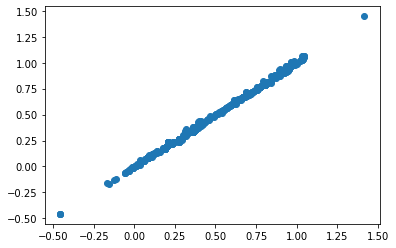

In [57]:
# Received help from Javad
plt.scatter(y_hat, y_hat_reg);

# Answer: 
# The plots are identical.

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

In [340]:
df = pd.read_csv("data/house_price.csv")

# removing NaN from numerical features
df.LotFrontage = df.LotFrontage.fillna(0)
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.MiscVal = df.MiscVal.fillna(0)
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

# contained a NaN, was type object
df.GarageYrBlt = df.GarageYrBlt.astype(int)

# replacing NaN with "NA" measure from description document
df = df.fillna("NA");

# df.head()

In [341]:
# dividing the columns into appropriate categories

# will be made into polynomials
poly = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
       "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",
       "PoolArea", "MiscVal"]

# will be dropped
drop = ["Id", "MoSold", "YrSold", "SalePrice"]

# will be made into dummies, then dropped
dummies = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
          "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
          "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", 
          "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical",
          "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 
           "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

# keeping as is (not used in engineering loop, just so I can keep track)
keep = ["YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "Bedroom", "Kitchen",
       "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars"]

# NOTE: data describer has "Bedroom" and "Kitchen", the data does not have those columns

In [394]:
# engineering X
X = df.copy()

columns = X.columns

for column in columns:
    
    if column in drop:
        X = X.drop(columns = [column])
        
    elif column in dummies:
        name = column + "_"
        X = X.join(pd.get_dummies(X[column], drop_first = True, prefix = name))
        X = X.drop(columns = [column])
    
    elif column in poly:
        X[column] = X[column].astype(int)
        name = column + "^2"
        X[name] = X[column] ** 2
        name = column + "^3"
        X[name] = X[column] ** 3

In [395]:
# setting up y
y = df["SalePrice"]

In [433]:
X = sm.add_constant(X)

# revisions:
# see below

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:21:03   Log-Likelihood:                -16651.
No. Observations:                1460   AIC:                         3.346e+04
Df Residuals:                    1380   BIC:                         3.388e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -8.191e+05   6.64e+04    -12.338      0.000   -9.49e+05   -6.89e+05
LotArea                    0.7919      0.089      8.942      0.000       0.618       0.966
YearBuilt                363.6834     40.102      9.069      0.000     285.016     442.351
KitchenAbvGr           -2.114e+04   3095.829     -6.828      0.000   -2.72e+04   -1.51e+04
Fireplaces              6619.0977   1137.761      5.818      0.000    4387.170    8851.025
GarageCars              3852.1195   1239.299      3.108      0.002    1421.005    6283.234
ScreenPorch               60.8636     11.260      5.405      0.000      38.775      82.952
PoolArea                -1.35e+04   2377.326     -5.680      0.000   -1.82e+04   -8840.283
MSZoning__FV             3.84e+04   8341.669      4.604      0.000     2.2e+04    5.48e+04
MSZoning__RH            3.015e+04   9468.659      3.184      0.001    1.16e+04    4.87e+04
MSZoning__RL             3.15e+04   7796.743      4.040      0.000    1.62e+04    4.68e+04
MSZoning__RM            2.265e+04   7781.512      2.911      0.004    7387.799    3.79e+04
LotArea^2              -1.327e-05   3.69e-06     -3.598      0.000   -2.05e-05   -6.03e-06
Street__Pave            3.277e+04   1.03e+04      3.187      0.001    1.26e+04    5.29e+04
LandSlope__Sev         -4.838e+04   1.01e+04     -4.785      0.000   -6.82e+04   -2.85e+04
Neighborhood__Edwards  -9430.8552   2539.566     -3.714      0.000   -1.44e+04   -4449.028
Neighborhood__NridgHt   1.897e+04   3357.898      5.648      0.000    1.24e+04    2.56e+04
Neighborhood__StoneBr   3.083e+04   5013.179      6.151      0.000     2.1e+04    4.07e+04
Condition1__Norm         1.01e+04   1807.156      5.590      0.000    6556.804    1.36e+04
Condition2__PosN       -3.201e+05   1.83e+04    -17.540      0.000   -3.56e+05   -2.84e+05
BldgType__Twnhs        -1.672e+04   3915.151     -4.270      0.000   -2.44e+04   -9036.324
BldgType__TwnhsE       -1.183e+04   2638.161     -4.485      0.000    -1.7e+04   -6655.816
HouseStyle__1Story     -9118.5384   2307.287     -3.952      0.000   -1.36e+04   -4592.370
HouseStyle__2.5Fin     -2.257e+04   9335.656     -2.417      0.016   -4.09e+04   -4252.696
HouseStyle__SFoyer     -1.532e+04   4301.077     -3.563      0.000   -2.38e+04   -6885.797
HouseStyle__SLvl       -1.174e+04   3434.391     -3.417      0.001   -1.85e+04   -4999.586
OverallQual__8          1.986e+04   2421.568      8.199      0.000    1.51e+04    2.46e+04
OverallQual__9          5.407e+04   5104.925     10.592      0.000    4.41e+04    6.41e+04
OverallQual__10         8.249e+04   7562.338     10.908      0.000    6.77e+04    9.73e+04
OverallCond__2         -9.576e+04   1.28e+04     -7.494      0.000   -1.21e+05   -7.07e+04
OverallCond__3         -1.086e+05   9947.823    -10.914      0.000   -1.28e+05  

In [434]:
# X = X.drop(columns = ["LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"])
# X = X.drop(columns = ["1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "HalfBath"])
# X = X.drop(columns = ["BedroomAbvGr", "TotRmsAbvGrd", "GarageYrBlt", "EnclosedPorch", "3SsnPorch", "MiscVal"])
# X = X.drop(columns = ["MSSubClass__30", "MSSubClass__40", "MSSubClass__45", "MSSubClass__50", "MSSubClass__60",
#                      "MSSubClass__70", "MSSubClass__75", "MSSubClass__80", "MSSubClass__85", "MSSubClass__90", 
#                      "MSSubClass__120", "MSSubClass__160", "MSSubClass__180", "MSSubClass__190"])
# X = X.drop(columns = ["WoodDeckSF", "LowQualFinSF", "LotFrontage^2", "LotFrontage^3", "LotArea^3", "Alley__NA", "Alley__Pave"])
# X = X.drop(columns = ["LotShape__IR2", "LotShape__IR3", "LotShape__Reg"])
# X = X.drop(columns = ["LandContour__HLS", "LandContour__Low", "LandContour__Lvl", "Utilities__NoSeWa"])
# X = X.drop(columns = ["LotConfig__CulDSac", "LotConfig__FR2", "LotConfig__FR3", "LotConfig__Inside", "LandSlope__Mod"])
# X = X.drop(columns = ["Neighborhood__Blueste", "Neighborhood__BrDale", "Neighborhood__BrkSide", "Neighborhood__ClearCr",
#                      "Neighborhood__CollgCr", "Neighborhood__Gilbert", "Neighborhood__IDOTRR", "Neighborhood__NAmes",
#                      "Neighborhood__NPkVill", "Neighborhood__NWAmes", "Neighborhood__OldTown", "Neighborhood__SWISU",
#                      "Neighborhood__Sawyer", "Neighborhood__SawyerW", "Neighborhood__Somerst", "Neighborhood__Timber",
#                      "Neighborhood__Veenker", "Neighborhood__Crawfor", "Neighborhood__NoRidge"])
# X = X.drop(columns = ["Neighborhood__Mitchel", "Condition1__Feedr", "Condition1__PosA", "Condition1__PosN", "Condition1__RRAe", "Condition1__RRNe",
#                      "Condition1__RRNn", "Condition2__Feedr", "Condition2__Norm", "Condition2__PosA", "Condition2__RRAe",
#                      "Condition2__RRAn", "Condition2__RRNn"])
# X = X.drop(columns = ["Neighborhood__MeadowV", "Condition1__RRAn", "BldgType__2fmCon", "BldgType__Duplex"])
# X = X.drop(columns = ["HouseStyle__1.5Unf", "HouseStyle__2.5Unf", "HouseStyle__2Story"])
# X = X.drop(columns = ["OverallQual__2", "OverallQual__3", "OverallQual__4", "OverallQual__5", "OverallQual__6",
#                      "OverallQual__7"])
# X = X.drop(columns = ["RoofStyle__Gable", "RoofStyle__Gambrel", "RoofStyle__Hip", "RoofStyle__Mansard"])
# X = X.drop(columns = ["Exterior1st__AsphShn", "Exterior1st__BrkComm", "Exterior1st__BrkFace", "Exterior1st__CBlock", 
#                       "Exterior1st__CemntBd", "Exterior1st__HdBoard", "Exterior1st__ImStucc", "Exterior1st__MetalSd", 
#                      "Exterior1st__Plywood", "Exterior1st__Stone", "Exterior1st__Stucco", "Exterior1st__VinylSd", 
#                      "Exterior1st__Wd Sdng", "Exterior1st__WdShing"])
# X = X.drop(columns = ["Exterior2nd__AsphShn", "Exterior2nd__Brk Cmn", "Exterior2nd__BrkFace", "Exterior2nd__CBlock", 
#                       "Exterior2nd__CmentBd", "Exterior2nd__HdBoard", "Exterior2nd__ImStucc", "Exterior2nd__MetalSd", 
#                      "Exterior2nd__Plywood", "Exterior2nd__Stone", "Exterior2nd__Stucco", "Exterior2nd__VinylSd", 
#                      "Exterior2nd__Wd Sdng", "Exterior2nd__Wd Shng"])
# X = X.drop(columns = ["Exterior2nd__Other", "MasVnrType__BrkFace", "MasVnrType__NA", "MasVnrType__None", "MasVnrType__Stone"])
# X = X.drop(columns = ["ExterQual__Fa", "ExterCond__Fa", "ExterCond__Gd", "ExterCond__TA", "ExterCond__Po"])
# X = X.drop(columns = ["MasVnrArea^3", "ExterQual__Gd",  "Foundation__CBlock", "Foundation__PConc", "Foundation__Slab", 
#                       "Foundation__Stone"])
# X = X.drop(columns = ["BsmtQual__NA", "BsmtCond__Gd", "BsmtCond__NA", "BsmtQual__Fa"])
# X = X.drop(columns = ["BsmtCond__TA", "BsmtExposure__Mn", "BsmtExposure__NA", "BsmtFinType1__BLQ", "BsmtFinType1__LwQ", 
#                       "BsmtFinType1__NA", "BsmtFinType1__Rec", "BsmtFinType1__Unf", "BsmtExposure__No"])
# X = X.drop(columns = ["BsmtFinSF1^3", "BsmtFinType2__BLQ", "BsmtFinType2__GLQ", "BsmtFinType2__LwQ", "BsmtFinType2__Rec",
#                       "BsmtFinType2__Unf", "BsmtFinSF2^2", "BsmtFinSF2^3", "BsmtUnfSF^2", "BsmtUnfSF^3", "TotalBsmtSF^2",
#                      "TotalBsmtSF^3"])
# X = X.drop(columns = ["Heating__GasA", "Heating__GasW", "Heating__Grav", "Heating__OthW", "Heating__Wall",
#                       "HeatingQC__Fa", "HeatingQC__Po"])
# X = X.drop(columns = ["CentralAir__Y", "Electrical__FuseF", "Electrical__FuseP", "Electrical__NA", "Electrical__SBrkr"])
# X = X.drop(columns = ["1stFlrSF^3", "2ndFlrSF^3", "LowQualFinSF^2", "LowQualFinSF^3", "GrLivArea^3"])
# X = X.drop(columns = ["Functional__Maj2", "Functional__Min1", "Functional__Min2", "Functional__Mod", "Functional__Sev"])
# X = X.drop(columns = ["FireplaceQu__Fa", "FireplaceQu__Gd", "FireplaceQu__NA", "FireplaceQu__Po", "FireplaceQu__TA"])
# X = X.drop(columns = ["GarageType__Attchd", "GarageType__Basment", "GarageType__BuiltIn", "GarageType__CarPort", 
#                       "GarageType__Detchd", "GarageType__NA", "GarageFinish__NA", "GarageFinish__RFn", "GarageFinish__Unf"])
# X = X.drop(columns = ["GarageQual__Fa", "GarageQual__Gd", "GarageQual__NA", "GarageQual__Po", "GarageQual__TA", 
#                       "GarageCond__Fa", "GarageCond__Gd", "GarageCond__NA", "GarageCond__Po", "GarageCond__TA"])
# X = X.drop(columns = ["PavedDrive__P", "PavedDrive__Y", "OpenPorchSF^2", "OpenPorchSF^3", "EnclosedPorch^2", 
#                       "EnclosedPorch^3", "ScreenPorch^2", "ScreenPorch^3"])
# X = X.drop(columns = ["3SsnPorch^3", "Fence__GdWo", "Fence__MnPrv", "Fence__MnWw", "Fence__NA"])
# X = X.drop(columns = ["MiscVal^3", "SaleType__CWD", "SaleType__ConLD", "SaleType__ConLI", "SaleType__ConLw", "SaleType__New", 
#                      "SaleType__Oth", "SaleType__WD"])
# X = X.drop(columns = ["SaleCondition__AdjLand", "SaleCondition__Alloca", "SaleCondition__Family"])
# X = X.drop(columns = ["YearRemodAdd", "FullBath", "OpenPorchSF", "GarageArea^2"])
# X = X.drop(columns = ["GarageArea"])